In [1]:
import numpy as np
from scipy.optimize import fsolve
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Генерация выборки для заданных $N$ и $p$: случайно выбираются длины векторов $X_i$, затем для каждого вектора длины $n_i$ генерируется число единиц в нем, имеющее биномиальное распределение $Bin(n_i, p)$. Для $X_i$ так же запоминается значение $I(X_i) = 0$, если в $X_i$ не было единиц и $1$ иначе.

In [2]:
def generate_sample(p, N):
    n = np.random.randint(low=1, high=20, size=N)
    X = np.zeros((N, ))
    I = np.zeros((N, ))

    for i in range(N):
        X[i] = np.random.binomial(n[i], p)
        if (X[i] > 0):
            I[i] = 1
    
    return n, X, I

In [3]:
def find_estimation(p, N):
    n, X, I = generate_sample(p, N)
    
    # equation to count eml
    eq = lambda x: sum(I / (1 - (1 - x) ** n)) - N
    
    p_est = fsolve(eq, .5)[0]
    return p_est

Всего было сгенерировано 300 выборок с $N = 10000$ и $p = 0.7$. Для каждой выборки была подсчитана оценка для $p$
по методу максимального правдоподобия: $\widehat{p} $

In [4]:
N = 10000
p = .7

est = []
n_samples = 300
for i in range(n_samples):
    est.append(find_estimation(p, N) / p)

Для моделирования оценки плотности распределения $\widehat{p}/p$ была построена гистограмма:

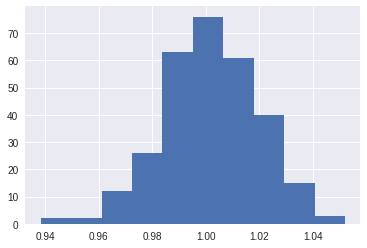

In [5]:
plt.hist(est)
print()